In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pylab as plt
from typing import Tuple

# Question 2: Fitting with censored data 

nWe need to fit censored data by minimizing a least squares criterion:

\begin{align}
J = \sum_{k=1}^K \left( y(k) - c^T x(k) \right)^2
\end{align}

where $y(1), \dots, y(M)$ are uncensored, while $y(M+1), \dots, y(K)$ are censored at a given value $D$.

Develop a method to how to find $c$ (the model parameter) and $y(M+1), \dots, y(K)$ (the censored data values) that minimize $J$.

In [2]:
# data for censored fitting problem.
n = 20  # dimension of x's
M = 25  # number of non-censored data points
K = 100 # total number of points
c_true=np.array([-0.43,-1.7,0.13,0.29,-1.1,1.2,1.2,-0.038,0.33,0.17,-0.19,0.73,-0.59,2.2,-0.14,0.11,1.1,0.059,-0.096,-0.83])

In [3]:
X = np.array(
    [
        [0.290000000000000,-1.60000000000000,4.30000000000000e-05,0.620000000000000,-1.20000000000000,0.130000000000000,-0.330000000000000,0.470000000000000,-0.460000000000000,0.640000000000000,-1,0.490000000000000,-0.540000000000000,1.10000000000000,-0.900000000000000,0.840000000000000,-0.650000000000000,-0.980000000000000,1.10000000000000,-0.0720000000000000,1.40000000000000,-0.780000000000000,-0.890000000000000,-2.40000000000000,-1.40000000000000,0.0830000000000000,-0.570000000000000,-0.0720000000000000,-0.0260000000000000,1.10000000000000,2.10000000000000,-0.510000000000000,0.720000000000000,-0.0890000000000000,-0.370000000000000,0.530000000000000,-0.0270000000000000,-0.510000000000000,-0.610000000000000,0.760000000000000,-1.40000000000000,0.760000000000000,0.200000000000000,-0.420000000000000,0.440000000000000,-1.60000000000000,-0.850000000000000,-1,0.490000000000000,0.720000000000000,-0.150000000000000,1.30000000000000,0.660000000000000,-0.260000000000000,1.70000000000000,-0.250000000000000,0.260000000000000,0.560000000000000,-0.800000000000000,-0.0730000000000000,-0.300000000000000,0.180000000000000,-0.670000000000000,-1.40000000000000,-0.760000000000000,0.740000000000000,-0.330000000000000,-0.500000000000000,0.0450000000000000,0.530000000000000,0.810000000000000,-0.800000000000000,0.250000000000000,0.310000000000000,-2.10000000000000,0.560000000000000,0.540000000000000,0.930000000000000,1.40000000000000,0.810000000000000,-0.400000000000000,-1.30000000000000,0.140000000000000,-0.0230000000000000,-1.30000000000000,-1.80000000000000,-1.70000000000000,-1.20000000000000,0.800000000000000,-0.250000000000000,-0.300000000000000,-0.530000000000000,0.870000000000000,0.720000000000000,0.870000000000000,0.450000000000000,0.910000000000000,0.370000000000000,-2.30000000000000,-0.600000000000000],
        [-1.30000000000000,0.260000000000000,-0.320000000000000,0.800000000000000,-2.20000000000000,0.660000000000000,-0.840000000000000,-0.900000000000000,0.370000000000000,-0.600000000000000,-0.180000000000000,-0.00500000000000000,-1.30000000000000,-0.250000000000000,0.140000000000000,-0.720000000000000,-1.10000000000000,-0.690000000000000,2.40000000000000,0.280000000000000,1.30000000000000,-0.770000000000000,0.140000000000000,-0.220000000000000,0.610000000000000,0.770000000000000,-1.50000000000000,-2.40000000000000,-1.10000000000000,1.60000000000000,0.0800000000000000,0.250000000000000,0.0390000000000000,-1,-0.830000000000000,1,0.170000000000000,0.230000000000000,0.690000000000000,-0.690000000000000,-0.690000000000000,-1.70000000000000,0.260000000000000,-0.610000000000000,0.570000000000000,0.430000000000000,0.350000000000000,-0.660000000000000,-0.870000000000000,1.60000000000000,0.320000000000000,0.670000000000000,-1.60000000000000,-1.40000000000000,0.120000000000000,-1.30000000000000,-0.190000000000000,0.480000000000000,0.310000000000000,-0.990000000000000,-0.170000000000000,0.230000000000000,-0.900000000000000,-0.300000000000000,-0.600000000000000,0.810000000000000,-2,0.210000000000000,2.40000000000000,2.10000000000000,-1,-0.00830000000000000,-1.40000000000000,1.40000000000000,-0.660000000000000,-2,0.680000000000000,1.20000000000000,0.420000000000000,1.90000000000000,0.910000000000000,1.20000000000000,-0.0160000000000000,0.110000000000000,-0.300000000000000,-1.50000000000000,0.480000000000000,0.300000000000000,0.880000000000000,-0.150000000000000,1.20000000000000,0.540000000000000,-0.800000000000000,-0.280000000000000,2.40000000000000,0.890000000000000,1.50000000000000,-0.550000000000000,1.40000000000000,-0.990000000000000],
        [0.710000000000000,-1.10000000000000,1.10000000000000,0.940000000000000,0.990000000000000,-1.20000000000000,0.500000000000000,0.0360000000000000,0.730000000000000,0.550000000000000,1.50000000000000,-0.280000000000000,1.10000000000000,-1.50000000000000,-0.140000000000000,-0.720000000000000,-0.0480000000000000,1.30000000000000,0.230000000000000,1.40000000000000,-0.910000000000000,-0.110000000000000,-0.240000000000000,0.0580000000000000,-1.30000000000000,2.20000000000000,-0.0500000000000000,-0.690000000000000,0.750000000000000,1.40000000000000,-0.940000000000000,0.370000000000000,1.50000000000000,0.940000000000000,0.290000000000000,-1.10000000000000,0.880000000000000,-0.600000000000000,0.0200000000000000,0.680000000000000,0.330000000000000,1.50000000000000,2.10000000000000,0.720000000000000,-0.690000000000000,-0.740000000000000,0.110000000000000,0.560000000000000,0.0800000000000000,-2.10000000000000,1.30000000000000,-0.280000000000000,-3,-1.30000000000000,0.650000000000000,1.20000000000000,-0.0790000000000000,-0.680000000000000,1.10000000000000,-0.750000000000000,0.180000000000000,-1.20000000000000,-0.150000000000000,-0.570000000000000,0.810000000000000,-0.140000000000000,1.60000000000000,0.750000000000000,-0.310000000000000,0.350000000000000,1.30000000000000,0.630000000000000,0.970000000000000,0.330000000000000,1.50000000000000,-0.760000000000000,-0.590000000000000,-0.250000000000000,0.0690000000000000,0.400000000000000,-0.140000000000000,1.50000000000000,-0.940000000000000,0.810000000000000,-2.60000000000000,0.820000000000000,-0.450000000000000,-0.730000000000000,-0.220000000000000,-1.20000000000000,1,0.680000000000000,-0.750000000000000,-1.40000000000000,0.110000000000000,1.10000000000000,-1.10000000000000,0.580000000000000,1.40000000000000,1.20000000000000],
        [1.60000000000000,1.40000000000000,-1.90000000000000,-0.990000000000000,-0.520000000000000,-0.460000000000000,1.50000000000000,-0.630000000000000,2.10000000000000,-1.10000000000000,-0.0380000000000000,1.30000000000000,-0.710000000000000,0.00970000000000000,-1.20000000000000,-0.200000000000000,0.380000000000000,-0.910000000000000,-0.270000000000000,0.180000000000000,-2.30000000000000,-0.980000000000000,-0.0750000000000000,-0.420000000000000,-0.660000000000000,0.330000000000000,0.550000000000000,-1.40000000000000,0.500000000000000,-0.760000000000000,0.640000000000000,0.180000000000000,-1.70000000000000,-1.10000000000000,-1.80000000000000,0.360000000000000,0.180000000000000,0.0210000000000000,1.10000000000000,-1.10000000000000,-1,-1.60000000000000,-2.30000000000000,0.340000000000000,0.830000000000000,0.560000000000000,-1.10000000000000,-1.20000000000000,-0.520000000000000,-0.740000000000000,-2.20000000000000,-0.0230000000000000,0.540000000000000,-0.890000000000000,2.10000000000000,1.50000000000000,0.700000000000000,0.280000000000000,-1.70000000000000,-0.0310000000000000,0.420000000000000,0.700000000000000,0.950000000000000,-0.120000000000000,0.0700000000000000,-0.100000000000000,0.230000000000000,-0.950000000000000,0.190000000000000,0.230000000000000,0.0150000000000000,0.150000000000000,1.60000000000000,0.480000000000000,-0.330000000000000,-2.40000000000000,-0.260000000000000,-0.710000000000000,0.290000000000000,-0.860000000000000,1.30000000000000,1.80000000000000,-1.50000000000000,-1,0.780000000000000,-0.230000000000000,0.390000000000000,-1.10000000000000,0.300000000000000,-0.0220000000000000,2.10000000000000,0.540000000000000,-0.750000000000000,0.460000000000000,0.0260000000000000,-0.100000000000000,1.80000000000000,-2,-0.450000000000000,2.40000000000000],
        [-0.690000000000000,-0.810000000000000,0.430000000000000,0.210000000000000,0.330000000000000,-0.260000000000000,-0.550000000000000,0.540000000000000,-1.40000000000000,0.0860000000000000,1.20000000000000,1.90000000000000,-0.0110000000000000,0.0710000000000000,1.20000000000000,-0.0200000000000000,-0.330000000000000,-0.410000000000000,0.700000000000000,-0.540000000000000,1.80000000000000,-0.960000000000000,-0.360000000000000,-0.200000000000000,-0.150000000000000,0.860000000000000,0.0830000000000000,0.330000000000000,-0.520000000000000,0.440000000000000,1.70000000000000,-0.0370000000000000,-1,-0.710000000000000,-1.60000000000000,-0.0370000000000000,0.760000000000000,0.420000000000000,-1.30000000000000,0.900000000000000,0.290000000000000,1.10000000000000,0.340000000000000,0.880000000000000,-2.20000000000000,-1.40000000000000,-0.680000000000000,-0.780000000000000,-1.40000000000000,0.180000000000000,1.30000000000000,-0.910000000000000,-1,0.590000000000000,-0.340000000000000,0.240000000000000,-0.800000000000000,-1.30000000000000,-1.10000000000000,0.990000000000000,1.70000000000000,0.430000000000000,1.60000000000000,-0.390000000000000,-1.80000000000000,-0.800000000000000,0.650000000000000,0.610000000000000,0.950000000000000,1.30000000000000,0.220000000000000,2.60000000000000,-1.40000000000000,0.400000000000000,2.70000000000000,-0.660000000000000,1.50000000000000,-0.590000000000000,0.470000000000000,2.40000000000000,0.320000000000000,0.630000000000000,0.360000000000000,-1,0.600000000000000,-1.60000000000000,0.0530000000000000,-1.40000000000000,-0.520000000000000,0.620000000000000,-0.660000000000000,-0.510000000000000,-0.310000000000000,1.10000000000000,0.970000000000000,1.50000000000000,0.150000000000000,0.520000000000000,-0.630000000000000,2.30000000000000],
        [0.860000000000000,0.530000000000000,0.900000000000000,0.240000000000000,0.230000000000000,-1.20000000000000,-0.850000000000000,0.550000000000000,-1,-2,-0.700000000000000,-0.520000000000000,-0.000820000000000000,0.320000000000000,-0.0150000000000000,0.280000000000000,-0.500000000000000,-0.510000000000000,-0.490000000000000,1.60000000000000,0.390000000000000,-2.40000000000000,-2.10000000000000,-1.50000000000000,0.250000000000000,0.680000000000000,1.60000000000000,0.600000000000000,-0.560000000000000,0.910000000000000,0.590000000000000,-1.60000000000000,-0.760000000000000,-1.20000000000000,2,-1.20000000000000,0.510000000000000,1.20000000000000,0.480000000000000,-2.10000000000000,1.10000000000000,-1.10000000000000,0.290000000000000,0.280000000000000,1.10000000000000,0.460000000000000,-0.280000000000000,0.270000000000000,-0.380000000000000,0.530000000000000,-0.380000000000000,-1,0.910000000000000,1.80000000000000,0.730000000000000,-1.40000000000000,-0.800000000000000,-0.720000000000000,-0.190000000000000,-0.600000000000000,2,1.50000000000000,0.430000000000000,-0.840000000000000,1.80000000000000,0.490000000000000,-1.10000000000000,1.80000000000000,-0.530000000000000,-0.0130000000000000,1.70000000000000,-1.30000000000000,-1.50000000000000,-0.0730000000000000,-1.60000000000000,-0.110000000000000,1,-0.260000000000000,1.80000000000000,-0.840000000000000,-0.480000000000000,0.0830000000000000,0.480000000000000,0.280000000000000,0.940000000000000,-0.320000000000000,-0.490000000000000,-0.590000000000000,-0.160000000000000,1.90000000000000,-1.10000000000000,-1.30000000000000,-1.50000000000000,-1,-0.00530000000000000,0.170000000000000,-0.280000000000000,1.60000000000000,1,2.30000000000000],
        [1.30000000000000,0.220000000000000,0.730000000000000,-1,0.0210000000000000,-1.30000000000000,-0.250000000000000,-0.200000000000000,1,-0.490000000000000,0.00750000000000000,0.100000000000000,-0.250000000000000,0.500000000000000,0.540000000000000,1.10000000000000,-0.0360000000000000,1.60000000000000,1.90000000000000,0.830000000000000,0.0200000000000000,-0.840000000000000,-0.140000000000000,-1.10000000000000,-0.0770000000000000,0.550000000000000,-0.330000000000000,0.150000000000000,-0.750000000000000,-1.10000000000000,0.790000000000000,0.340000000000000,2.20000000000000,1.10000000000000,-0.0720000000000000,-0.280000000000000,0.130000000000000,0.770000000000000,-1.60000000000000,0.280000000000000,0.240000000000000,0.390000000000000,0.660000000000000,-0.150000000000000,-0.00160000000000000,0.630000000000000,0.650000000000000,1.50000000000000,-0.460000000000000,-0.550000000000000,0.00250000000000000,0.370000000000000,1.60000000000000,1.30000000000000,0.290000000000000,0.660000000000000,-0.00760000000000000,-0.660000000000000,0.460000000000000,1.50000000000000,0.700000000000000,-0.510000000000000,-0.560000000000000,-1.70000000000000,0.650000000000000,1.20000000000000,0.200000000000000,0.0890000000000000,-1.10000000000000,-1.30000000000000,-2.10000000000000,1,-0.0750000000000000,1.30000000000000,-0.540000000000000,0.300000000000000,0.300000000000000,1.20000000000000,0.260000000000000,0.280000000000000,0.0760000000000000,2.10000000000000,0.320000000000000,0.290000000000000,-1,-0.800000000000000,0.240000000000000,0.520000000000000,-0.0980000000000000,0.0820000000000000,0.950000000000000,-0.610000000000000,0.830000000000000,-2.80000000000000,1.40000000000000,0.800000000000000,1.70000000000000,0.730000000000000,-0.490000000000000,-0.270000000000000],
        [-1.60000000000000,-0.920000000000000,0.580000000000000,-0.740000000000000,-1,0.930000000000000,0.660000000000000,-2.10000000000000,-0.390000000000000,0.460000000000000,-0.780000000000000,-0.810000000000000,0.400000000000000,1.30000000000000,-0.720000000000000,0.620000000000000,-0.170000000000000,0.0810000000000000,1.10000000000000,0.230000000000000,-0.410000000000000,0.260000000000000,1.40000000000000,-0.820000000000000,1.70000000000000,1,0.800000000000000,-0.100000000000000,0.930000000000000,0.200000000000000,0.110000000000000,-0.130000000000000,0.430000000000000,-0.680000000000000,2.60000000000000,-0.160000000000000,0.280000000000000,-2.60000000000000,-1.40000000000000,-0.730000000000000,0.160000000000000,0.970000000000000,-0.580000000000000,-0.0900000000000000,-1.60000000000000,0.380000000000000,-1.20000000000000,-1.10000000000000,-0.290000000000000,0.300000000000000,0.880000000000000,0.900000000000000,-0.980000000000000,-0.490000000000000,-0.850000000000000,-2.60000000000000,-0.730000000000000,0.200000000000000,-0.920000000000000,-0.810000000000000,-1.40000000000000,-0.00670000000000000,0.180000000000000,-0.450000000000000,-1.50000000000000,1.30000000000000,1.70000000000000,2.60000000000000,-1.60000000000000,-0.560000000000000,0.110000000000000,0.780000000000000,0.0810000000000000,0.980000000000000,0.550000000000000,-0.580000000000000,-0.820000000000000,-1.50000000000000,1.50000000000000,0.820000000000000,-0.110000000000000,1.30000000000000,-1.90000000000000,-0.250000000000000,-0.0680000000000000,0.690000000000000,0.720000000000000,-1.50000000000000,1,1.60000000000000,-0.400000000000000,-0.570000000000000,-0.610000000000000,1,1.80000000000000,-1.70000000000000,0.670000000000000,0.560000000000000,-0.400000000000000,0.500000000000000],
        [-1.40000000000000,-2.20000000000000,0.0400000000000000,1.10000000000000,-0.950000000000000,0.0110000000000000,-0.850000000000000,0.130000000000000,-1.40000000000000,-0.320000000000000,0.590000000000000,0.680000000000000,-0.260000000000000,-0.550000000000000,-0.660000000000000,-1.80000000000000,-0.960000000000000,-1.10000000000000,-1.20000000000000,0.670000000000000,-1.50000000000000,-0.180000000000000,0.650000000000000,0.370000000000000,1.60000000000000,1.30000000000000,-0.780000000000000,-2.60000000000000,-0.250000000000000,0.760000000000000,-0.160000000000000,0.490000000000000,-0.440000000000000,-1.70000000000000,-0.240000000000000,-1.10000000000000,-0.980000000000000,0.290000000000000,0.290000000000000,-0.770000000000000,0.410000000000000,0.820000000000000,0.890000000000000,0.290000000000000,-1.20000000000000,-1,-0.600000000000000,0.630000000000000,-0.300000000000000,-1.20000000000000,0.580000000000000,1.30000000000000,1,-2.20000000000000,-2.50000000000000,-0.530000000000000,-1.50000000000000,-1.80000000000000,-0.650000000000000,0.650000000000000,0.360000000000000,-0.530000000000000,-0.770000000000000,-1.50000000000000,-0.380000000000000,-0.280000000000000,0.730000000000000,-0.680000000000000,1.20000000000000,0.760000000000000,-1.10000000000000,-0.830000000000000,-0.840000000000000,1.70000000000000,1.50000000000000,-3.10000000000000,-0.490000000000000,-0.390000000000000,0.320000000000000,1.20000000000000,1.40000000000000,-1.80000000000000,0.680000000000000,-0.220000000000000,0.0820000000000000,-0.0420000000000000,0.150000000000000,-0.0870000000000000,0.430000000000000,-0.380000000000000,-0.380000000000000,0.0860000000000000,0.960000000000000,0.0770000000000000,0.890000000000000,0.170000000000000,-0.350000000000000,-0.810000000000000,1.40000000000000,-0.120000000000000],
        [0.570000000000000,-0.0590000000000000,0.680000000000000,-0.130000000000000,-0.370000000000000,-0.650000000000000,-1.20000000000000,1.60000000000000,0.320000000000000,1.20000000000000,-0.250000000000000,-2.40000000000000,-1.70000000000000,0.260000000000000,0.310000000000000,0.700000000000000,1.30000000000000,-1.10000000000000,-0.670000000000000,-0.510000000000000,0.220000000000000,-0.170000000000000,-0.380000000000000,-0.590000000000000,0.630000000000000,0.0440000000000000,-1.30000000000000,0.0280000000000000,-0.150000000000000,-1.30000000000000,0.870000000000000,0.600000000000000,0.0300000000000000,0.810000000000000,0.170000000000000,-2,-0.940000000000000,0.830000000000000,-0.140000000000000,0.150000000000000,1.20000000000000,0.0370000000000000,0.170000000000000,1.20000000000000,0.210000000000000,-0.350000000000000,-0.480000000000000,-0.800000000000000,-1.60000000000000,-0.190000000000000,-1.60000000000000,-0.130000000000000,0.160000000000000,0.240000000000000,-2.40000000000000,3.20000000000000,0.870000000000000,-1.40000000000000,0.620000000000000,-1.30000000000000,-0.570000000000000,0.720000000000000,-0.940000000000000,-0.0960000000000000,0.210000000000000,0.220000000000000,0.790000000000000,2.80000000000000,0.490000000000000,-0.910000000000000,-1.60000000000000,-0.590000000000000,-0.560000000000000,-0.410000000000000,-0.460000000000000,1.60000000000000,0.870000000000000,0.280000000000000,0.800000000000000,-0.0640000000000000,0.710000000000000,-0.0140000000000000,0.230000000000000,0.900000000000000,-1.80000000000000,0.320000000000000,0.130000000000000,-0.0130000000000000,-0.0260000000000000,-1.30000000000000,0.480000000000000,0.690000000000000,2,-1.90000000000000,1.10000000000000,-0.480000000000000,-0.260000000000000,-0.540000000000000,0.280000000000000,-0.00190000000000000],
        [-0.400000000000000,-1,0.570000000000000,0.390000000000000,-1.20000000000000,0.810000000000000,-0.120000000000000,1,1.60000000000000,-0.630000000000000,0.480000000000000,0.990000000000000,-1,-0.0130000000000000,0.110000000000000,0.810000000000000,0.440000000000000,1.70000000000000,1.30000000000000,0.860000000000000,-1.40000000000000,-0.120000000000000,-0.660000000000000,1.50000000000000,0.0920000000000000,-0.310000000000000,0.670000000000000,-0.880000000000000,-1.30000000000000,-0.950000000000000,-0.190000000000000,-0.0860000000000000,-0.320000000000000,1.40000000000000,0.920000000000000,-0.910000000000000,-0.0130000000000000,-0.00810000000000000,-1.10000000000000,-0.340000000000000,1.40000000000000,-0.930000000000000,0.850000000000000,0.810000000000000,0.220000000000000,0.440000000000000,0.980000000000000,-0.310000000000000,1.10000000000000,-0.300000000000000,-1.50000000000000,0.610000000000000,-0.590000000000000,-0.740000000000000,-0.350000000000000,0.440000000000000,-0.270000000000000,0.200000000000000,-1.30000000000000,-0.870000000000000,-1,1.10000000000000,-1.40000000000000,0.910000000000000,-0.770000000000000,0.630000000000000,0.600000000000000,-0.0170000000000000,1.60000000000000,1.40000000000000,0.640000000000000,0.0660000000000000,-0.0280000000000000,0.570000000000000,-0.500000000000000,-0.410000000000000,0.360000000000000,0.830000000000000,0.580000000000000,0.650000000000000,0.370000000000000,2.50000000000000,1.20000000000000,-0.640000000000000,-1.80000000000000,0.510000000000000,-1,-0.350000000000000,-0.380000000000000,-0.720000000000000,0.440000000000000,2.10000000000000,0.290000000000000,-0.610000000000000,0.400000000000000,-0.730000000000000,-0.640000000000000,1.30000000000000,1.90000000000000,-0.430000000000000],
        [0.690000000000000,0.610000000000000,-0.260000000000000,0.0880000000000000,-1.10000000000000,0.230000000000000,-0.0650000000000000,-1.60000000000000,0.710000000000000,-2.30000000000000,0.670000000000000,0.220000000000000,0.240000000000000,-0.580000000000000,1.80000000000000,0.640000000000000,1.30000000000000,1.90000000000000,0.390000000000000,0.270000000000000,-0.840000000000000,0.170000000000000,0.250000000000000,0.140000000000000,-0.810000000000000,0.230000000000000,-1.40000000000000,-0.270000000000000,0.310000000000000,0.780000000000000,0.0750000000000000,0.330000000000000,0.980000000000000,0.670000000000000,-0.180000000000000,-0.00560000000000000,0.350000000000000,0.860000000000000,-0.290000000000000,0.970000000000000,-1,-0.110000000000000,0.960000000000000,-1.40000000000000,-1,-1.60000000000000,1.80000000000000,-0.600000000000000,1.30000000000000,0.960000000000000,0.570000000000000,2,1.60000000000000,-1.80000000000000,-0.610000000000000,-1.10000000000000,-1.60000000000000,1.50000000000000,1,-0.470000000000000,0.700000000000000,0.500000000000000,-1.90000000000000,2.40000000000000,-0.110000000000000,-0.550000000000000,-0.0580000000000000,0.270000000000000,-0.450000000000000,0.250000000000000,-0.400000000000000,-0.0120000000000000,-1.20000000000000,0.740000000000000,1.20000000000000,1.40000000000000,-0.0800000000000000,-0.980000000000000,1.80000000000000,-1.80000000000000,-0.600000000000000,-0.670000000000000,0.130000000000000,-0.180000000000000,-0.660000000000000,-1,1.30000000000000,0.990000000000000,-0.240000000000000,-0.560000000000000,0.380000000000000,-0.00290000000000000,-0.390000000000000,1.20000000000000,0.190000000000000,-2.10000000000000,-0.910000000000000,-0.480000000000000,-0.800000000000000,-0.190000000000000],
        [0.820000000000000,0.510000000000000,-0.380000000000000,-0.640000000000000,1.50000000000000,-0.990000000000000,0.490000000000000,-0.0790000000000000,2,-1.20000000000000,-0.0780000000000000,0.260000000000000,-1.30000000000000,2.10000000000000,-0.280000000000000,1.30000000000000,-0.500000000000000,1.60000000000000,0.390000000000000,0.620000000000000,-0.210000000000000,-0.500000000000000,-0.380000000000000,-1.90000000000000,-0.460000000000000,1,-1.30000000000000,-0.330000000000000,2.70000000000000,-0.00630000000000000,-0.530000000000000,-0.340000000000000,0.0180000000000000,0.140000000000000,-0.520000000000000,-1.70000000000000,-0.890000000000000,0.770000000000000,-0.580000000000000,-0.110000000000000,0.210000000000000,-0.800000000000000,1.30000000000000,0.120000000000000,-0.450000000000000,-0.700000000000000,1.40000000000000,1.30000000000000,-0.130000000000000,-0.530000000000000,-0.910000000000000,2.30000000000000,-0.520000000000000,0.450000000000000,-0.410000000000000,0.890000000000000,-0.390000000000000,0.370000000000000,0.860000000000000,0.220000000000000,0.480000000000000,2.80000000000000,-0.0650000000000000,0.520000000000000,0.340000000000000,0.230000000000000,-1.10000000000000,-0.910000000000000,1,0.120000000000000,-0.400000000000000,-0.0770000000000000,0.730000000000000,0.220000000000000,0.0410000000000000,-1.40000000000000,0.750000000000000,-0.100000000000000,-0.940000000000000,0.0600000000000000,-0.850000000000000,0.260000000000000,0.180000000000000,0.720000000000000,1.40000000000000,0.0990000000000000,1.20000000000000,0.640000000000000,-1.20000000000000,0.620000000000000,1.10000000000000,-0.0900000000000000,0.580000000000000,-0.580000000000000,-0.690000000000000,-1.80000000000000,0.720000000000000,-1.80000000000000,-0.560000000000000,0.990000000000000],
        [0.710000000000000,1.70000000000000,-0.300000000000000,-0.560000000000000,0.0560000000000000,1.30000000000000,-0.600000000000000,-0.680000000000000,0.500000000000000,1.10000000000000,0.890000000000000,1.20000000000000,-0.350000000000000,-0.260000000000000,2.20000000000000,0.330000000000000,-1.10000000000000,-1.30000000000000,-1.70000000000000,-1,0.760000000000000,-0.710000000000000,-0.530000000000000,-0.450000000000000,-1.40000000000000,1.20000000000000,-0.610000000000000,-1.20000000000000,0.290000000000000,0.520000000000000,-0.690000000000000,-0.320000000000000,0.820000000000000,-0.860000000000000,1.40000000000000,1.30000000000000,0.810000000000000,1.30000000000000,-0.900000000000000,1,0.590000000000000,-1.70000000000000,-0.0640000000000000,-0.220000000000000,1.40000000000000,-1.10000000000000,0.910000000000000,0.860000000000000,-0.740000000000000,-0.900000000000000,-1.60000000000000,-0.370000000000000,1.20000000000000,0.580000000000000,-1.40000000000000,-0.280000000000000,-0.140000000000000,-0.440000000000000,-0.640000000000000,1.90000000000000,-0.190000000000000,-0.160000000000000,0.670000000000000,0.410000000000000,1,0.360000000000000,2.10000000000000,-2,2,0.380000000000000,0.0840000000000000,-1.60000000000000,0.0600000000000000,1.30000000000000,0.750000000000000,0.900000000000000,-1.80000000000000,0.130000000000000,-0.920000000000000,-0.760000000000000,0.660000000000000,-0.370000000000000,-0.610000000000000,0.300000000000000,2.10000000000000,-0.120000000000000,-2.60000000000000,2.90000000000000,0.760000000000000,-1.30000000000000,0.860000000000000,-0.250000000000000,-1.10000000000000,-0.260000000000000,0.0110000000000000,-0.0520000000000000,-0.00730000000000000,-0.930000000000000,1.70000000000000,0.470000000000000],
        [1.30000000000000,0.590000000000000,-1.50000000000000,0.440000000000000,-1.20000000000000,0.290000000000000,-0.150000000000000,-1,1.90000000000000,-0.110000000000000,2.30000000000000,-0.270000000000000,-0.940000000000000,-1.40000000000000,1.50000000000000,-0.670000000000000,0.810000000000000,-0.210000000000000,0.230000000000000,1.50000000000000,0.380000000000000,0.510000000000000,0.0550000000000000,-0.650000000000000,-0.370000000000000,-0.540000000000000,-1.50000000000000,0.580000000000000,-1.40000000000000,1.40000000000000,-0.270000000000000,-0.380000000000000,0.700000000000000,-0.750000000000000,-0.870000000000000,-0.600000000000000,0.110000000000000,1.20000000000000,0.250000000000000,-0.480000000000000,-0.260000000000000,-0.900000000000000,1.30000000000000,0.570000000000000,-0.460000000000000,1,0.330000000000000,-2.10000000000000,0.210000000000000,-0.890000000000000,-0.360000000000000,2.20000000000000,1.60000000000000,0.860000000000000,0.230000000000000,1,-2.30000000000000,-0.0490000000000000,0.660000000000000,0.110000000000000,-0.380000000000000,0.430000000000000,0.210000000000000,1.10000000000000,-1.40000000000000,0.520000000000000,-1.40000000000000,-0.320000000000000,0.600000000000000,-0.0700000000000000,-0.440000000000000,1.70000000000000,0.150000000000000,0.630000000000000,1.20000000000000,0.540000000000000,1.20000000000000,0.0630000000000000,0.380000000000000,-1.70000000000000,1.50000000000000,1.30000000000000,-1,1.50000000000000,0.170000000000000,0.690000000000000,-2.10000000000000,-1.20000000000000,1.20000000000000,-0.120000000000000,-1.20000000000000,-0.870000000000000,0.0610000000000000,0.00470000000000000,-1.10000000000000,-0.0860000000000000,-2.80000000000000,0.920000000000000,-0.640000000000000,-1.40000000000000],
        [0.670000000000000,-0.640000000000000,-0.230000000000000,-0.950000000000000,-0.0410000000000000,1.50000000000000,-0.430000000000000,-1.20000000000000,-0.340000000000000,0.380000000000000,0.520000000000000,-0.130000000000000,-1.20000000000000,1.80000000000000,-1.90000000000000,-0.150000000000000,0.0410000000000000,-0.200000000000000,0.690000000000000,0.430000000000000,-1.30000000000000,-0.420000000000000,1.30000000000000,0.100000000000000,-0.470000000000000,0.910000000000000,0.560000000000000,0.240000000000000,0.250000000000000,0.480000000000000,-1.20000000000000,-0.950000000000000,-0.230000000000000,1.20000000000000,0.810000000000000,-2.10000000000000,2.70000000000000,0.960000000000000,-1.50000000000000,0.0690000000000000,2.50000000000000,0.590000000000000,0.230000000000000,-0.300000000000000,0.0330000000000000,1.70000000000000,0.0700000000000000,-0.360000000000000,-0.400000000000000,0.280000000000000,-0.400000000000000,-0.160000000000000,-2.10000000000000,-0.270000000000000,0.210000000000000,-0.360000000000000,-1.40000000000000,0.0780000000000000,1.30000000000000,-0.410000000000000,-0.890000000000000,-2,-0.00810000000000000,0.430000000000000,-1,-0.620000000000000,0.460000000000000,0.590000000000000,0.0180000000000000,-0.580000000000000,-0.560000000000000,-0.470000000000000,1.60000000000000,-1.10000000000000,0.300000000000000,-0.470000000000000,-0.0610000000000000,0.370000000000000,0.910000000000000,1.10000000000000,-0.810000000000000,-0.650000000000000,-0.300000000000000,-0.0440000000000000,-1.70000000000000,1.90000000000000,0.390000000000000,0.160000000000000,-1,-1.10000000000000,0.400000000000000,0.420000000000000,0.0120000000000000,-0.0390000000000000,1.90000000000000,-1.20000000000000,-0.150000000000000,0.0410000000000000,-1.40000000000000,0.270000000000000],
        [1.20000000000000,0.380000000000000,0.120000000000000,0.780000000000000,-1.10000000000000,1.10000000000000,-0.0790000000000000,0.290000000000000,-1.10000000000000,0.940000000000000,-0.0120000000000000,-1.30000000000000,-1,0.330000000000000,-1.70000000000000,-2.40000000000000,-0.760000000000000,0.310000000000000,-0.640000000000000,-1.90000000000000,1.50000000000000,0.230000000000000,-2.50000000000000,-0.220000000000000,1.80000000000000,-0.170000000000000,-0.280000000000000,-0.350000000000000,-1.40000000000000,-0.790000000000000,0.250000000000000,0.230000000000000,-0.110000000000000,1.20000000000000,-0.510000000000000,0.110000000000000,0.410000000000000,-1.70000000000000,0.310000000000000,0.400000000000000,0.860000000000000,0.550000000000000,-1.40000000000000,1.10000000000000,0.800000000000000,0.710000000000000,-1.50000000000000,0.550000000000000,0.0650000000000000,-0.750000000000000,-1.20000000000000,-0.700000000000000,2.90000000000000,-0.420000000000000,-0.720000000000000,1.30000000000000,-1.80000000000000,2,0.310000000000000,0.510000000000000,-1.80000000000000,-0.550000000000000,0.0200000000000000,1.30000000000000,-0.640000000000000,1.30000000000000,0.390000000000000,0.830000000000000,-1.60000000000000,0.470000000000000,0.880000000000000,0.0950000000000000,-0.780000000000000,-0.450000000000000,1.10000000000000,2.40000000000000,-0.390000000000000,-0.100000000000000,0.150000000000000,1.50000000000000,-1.30000000000000,0.0620000000000000,1.50000000000000,-0.0300000000000000,0.280000000000000,0.330000000000000,-0.860000000000000,0.790000000000000,1.70000000000000,-2.80000000000000,-0.580000000000000,-0.130000000000000,-0.170000000000000,-0.510000000000000,-0.170000000000000,-0.750000000000000,0.580000000000000,0.410000000000000,-0.760000000000000,2.60000000000000],
        [-1.20000000000000,-1,0.310000000000000,0.570000000000000,-1.30000000000000,-0.680000000000000,1.50000000000000,-0.430000000000000,-0.210000000000000,-2.10000000000000,0.910000000000000,-1.70000000000000,-0.400000000000000,-1.10000000000000,-0.570000000000000,0.470000000000000,-0.0890000000000000,-0.570000000000000,-1,0.470000000000000,0.0330000000000000,-0.960000000000000,0.580000000000000,-0.280000000000000,0.750000000000000,-0.340000000000000,-1.30000000000000,0.890000000000000,0.150000000000000,0.750000000000000,0.100000000000000,1.20000000000000,0.130000000000000,-0.610000000000000,0.740000000000000,1.50000000000000,-1.30000000000000,-0.990000000000000,-2,1.10000000000000,-0.850000000000000,-0.420000000000000,-0.150000000000000,-0.180000000000000,0.900000000000000,-0.750000000000000,-0.420000000000000,-1.60000000000000,-1.80000000000000,1.60000000000000,-1.10000000000000,0.560000000000000,1.40000000000000,-0.210000000000000,0.760000000000000,1,1.10000000000000,-0.0730000000000000,0.860000000000000,-1.20000000000000,-1.60000000000000,-1.90000000000000,-0.560000000000000,-0.190000000000000,0.170000000000000,0.970000000000000,2.10000000000000,-1.70000000000000,1.20000000000000,1.30000000000000,-0.810000000000000,0.290000000000000,1.60000000000000,-0.730000000000000,0.770000000000000,2,0.610000000000000,-0.700000000000000,-0.200000000000000,0.240000000000000,1.70000000000000,-0.740000000000000,1.80000000000000,-0.380000000000000,0.390000000000000,-0.0950000000000000,-1.20000000000000,-0.580000000000000,-0.490000000000000,0.250000000000000,-0.980000000000000,0.540000000000000,-0.690000000000000,-1.20000000000000,-0.730000000000000,0.950000000000000,0.750000000000000,0.600000000000000,0.160000000000000,-0.0540000000000000],
        [-0.0200000000000000,-0.0200000000000000,1.40000000000000,-0.820000000000000,-0.260000000000000,-1.30000000000000,-0.610000000000000,0.0560000000000000,1.20000000000000,-0.640000000000000,0.0560000000000000,-0.700000000000000,0.170000000000000,0.620000000000000,-0.190000000000000,0.120000000000000,-2,-0.980000000000000,-0.190000000000000,1.30000000000000,1.90000000000000,-0.150000000000000,-1,-0.730000000000000,0.0650000000000000,0.540000000000000,-0.890000000000000,1.60000000000000,-1.70000000000000,-0.170000000000000,-0.0410000000000000,-0.580000000000000,-0.800000000000000,0.810000000000000,0.850000000000000,0.0530000000000000,0.380000000000000,0.690000000000000,0.530000000000000,0.620000000000000,0.810000000000000,0.0620000000000000,-0.500000000000000,-1.50000000000000,0.140000000000000,0.230000000000000,-0.0210000000000000,-0.210000000000000,1.70000000000000,0.570000000000000,0.290000000000000,-0.0500000000000000,1.10000000000000,-0.170000000000000,-1.60000000000000,0.210000000000000,-0.140000000000000,0.940000000000000,0.130000000000000,-0.0960000000000000,-1.20000000000000,-0.110000000000000,1.90000000000000,0.130000000000000,1.30000000000000,-2.40000000000000,-0.320000000000000,-1.90000000000000,0.680000000000000,1.60000000000000,-0.260000000000000,0.920000000000000,1.10000000000000,0.350000000000000,-1.30000000000000,0.800000000000000,0.640000000000000,-0.390000000000000,1.50000000000000,-1.10000000000000,0.100000000000000,-0.180000000000000,-1.30000000000000,-0.550000000000000,-0.0990000000000000,0.0310000000000000,2.60000000000000,0.530000000000000,0.170000000000000,-0.860000000000000,0.120000000000000,0.880000000000000,-0.990000000000000,0.710000000000000,-0.990000000000000,-0.180000000000000,-0.170000000000000,1.90000000000000,0.380000000000000,0.470000000000000],
        [-0.160000000000000,-0.0480000000000000,-0.350000000000000,-0.270000000000000,0.950000000000000,-0.0730000000000000,-1.30000000000000,-0.370000000000000,-1.10000000000000,-0.700000000000000,-1.10000000000000,0.280000000000000,-0.120000000000000,1.30000000000000,0.00890000000000000,-0.590000000000000,1.10000000000000,-0.450000000000000,-1.10000000000000,0.640000000000000,-1.20000000000000,0.740000000000000,0.940000000000000,-0.0650000000000000,-0.290000000000000,0.930000000000000,-0.990000000000000,-1.10000000000000,0.720000000000000,-0.820000000000000,-2.20000000000000,-0.500000000000000,-0.240000000000000,0.220000000000000,-0.830000000000000,0.160000000000000,0.500000000000000,-0.970000000000000,0.340000000000000,-0.290000000000000,0.700000000000000,0.460000000000000,-1.70000000000000,1.40000000000000,-1.60000000000000,-0.220000000000000,0.230000000000000,-0.430000000000000,0.330000000000000,0.320000000000000,-1.90000000000000,1.20000000000000,-0.770000000000000,0.220000000000000,-1.10000000000000,-0.300000000000000,1.10000000000000,-0.0800000000000000,0.0170000000000000,0.450000000000000,-0.420000000000000,-1.30000000000000,-0.220000000000000,-0.660000000000000,1.90000000000000,-1.10000000000000,1.50000000000000,-0.440000000000000,-0.780000000000000,-0.700000000000000,0.490000000000000,0.510000000000000,-0.170000000000000,-0.510000000000000,-0.510000000000000,0.0310000000000000,1,0.0160000000000000,-0.620000000000000,2.40000000000000,-0.800000000000000,1.10000000000000,0.390000000000000,0.930000000000000,0.180000000000000,-0.610000000000000,-0.900000000000000,1.70000000000000,0.350000000000000,1.10000000000000,0.0680000000000000,-1.30000000000000,-0.0500000000000000,0.730000000000000,0.890000000000000,-0.0660000000000000,-0.580000000000000,0.710000000000000,0.180000000000000,-2.10000000000000],
    ]
)

In [4]:
y = X.T @ c_true + 0.1 * (np.sqrt(n)) * np.array(
    [-0.8,-0.46,0.19,0.89,-1.6,-0.32,-0.7,-0.74,0.37,1.4,0.46,0.66,1.1,0.98,-1.3,-0.023,0.13,2.4,0.9,0.076,0.36,-2.1,-2.3,-0.37,1.3,0.56,-0.18,-0.036,1.9,1.3,-0.36,-0.33,0.083,0.43,-1.2,-2.7,-0.54,2.2,-0.61,1.4,1.2,0.74,-0.12,-0.031,-1,-1,0.63,0.87,2.1,-0.59,0.59,1.5,2.1,-0.75,-1.5,-0.21,0.49,-0.32,0.82,-1.4,1.1,0.98,0.49,1.3,0.59,0.45,-1.4,-0.92,-1.4,-1.5,0.097,-0.23,-0.32,0.63,0.039,-0.016,0.45,-0.52,-1.1,-0.048,-0.5,1.6,-0.24,-0.96,-0.15,1.7,1.6,-1.1,0.097,0.25,2.2,0.31,2,-0.12,-0.27,1.4,-0.074,-0.36,-0.78,-0.25]
)

In [5]:
# Reorder measurements, then censor
sort_ind = y.argsort()
y_sorted = np.sort(y)
X_sorted = X[:, sort_ind]
D = (y_sorted[M-1] + y_sorted[M])/2.
y_sorted_lower_than_censor = y_sorted[0:M]
print(f"censoring limit: D = {D}")

censoring limit: D = -1.7711893730350097


### Censored data solution

In [6]:
# Define variables for c and for the censored y's
y_optimize = cvx.Variable(K-M)
c_optimize = cvx.Variable(n)

In [7]:
# Define the objective
obj = cvx.Minimize(
    cvx.sum_squares(
        y_sorted_lower_than_censor - c_optimize @ X_sorted[:, :M]
    ) + cvx.sum_squares(
        y_optimize - c_optimize @ X_sorted[:, M:]
    )
)

In [8]:
# Constraints:
# It is known that the y_optimize are larger than D
constraints = [
    y_optimize >= D
]

In [9]:
# Form and solve problem
prob = cvx.Problem(obj, constraints)
prob.solve()  # Returns the optimal value.


2.906876415923432

In [10]:
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal y_optimize", y_optimize.value)
print("optimal c_optimize", c_optimize.value)

status: optimal
optimal value 2.906876415923432
optimal y_optimize [-1.77118937 -1.77118937 -1.77118937 -0.95829517 -1.77118937 -1.13626274
 -1.77118937 -0.02286505 -0.09008158 -0.12009687 -1.56787885 -0.59151909
 -0.67852659 -0.57801915 -0.5315927   0.63774948 -1.77118937 -0.48991803
  0.52737461 -1.68441679 -0.40939791  1.42132709 -0.05693459 -0.12164116
  0.99948451 -0.94689432  0.87752296 -0.70229157  0.83151007 -0.59002776
  1.6794431   1.111424    0.31755519  2.04171861  0.29749284  0.90432046
  1.73009944  0.7461145   0.84981792  1.4216424  -0.09576961  1.80549518
  1.50434409  2.28374867  2.21393509  1.94564913  1.49574471  2.20099475
  1.70436509  1.58100294  2.83930129  2.6530557   1.78979132  4.21379333
  1.7434385   2.65101692  3.34930614  3.06804619  3.53776838  2.22628426
  3.47571855  5.34779294  4.22878624  5.84285859  5.86088554  7.02343156
  7.24840057  7.2818367   6.44458835  7.83170995  8.60165832  8.01967606
  9.1638104   9.0719113  14.29494727]
optimal c_optimize 

In [11]:
# Compute desired residual accuracy norm
residual_censored = np.sqrt(np.sum((c_true - c_optimize.value)**2)) / np.sqrt(np.sum(c_true**2))
print(f"Residual_censored: {residual_censored}")

Residual_censored: 0.17521758003435306


In [12]:
np.array([c_true, c_optimize.value]).T

array([[-0.43      , -0.3269437 ],
       [-1.7       , -1.77504259],
       [ 0.13      ,  0.33810052],
       [ 0.29      ,  0.24061117],
       [-1.1       , -0.92119447],
       [ 1.2       ,  1.33051771],
       [ 1.2       ,  1.35453779],
       [-0.038     , -0.11834819],
       [ 0.33      ,  0.33629335],
       [ 0.17      ,  0.28196704],
       [-0.19      , -0.12448658],
       [ 0.73      ,  1.06476889],
       [-0.59      , -0.42509169],
       [ 2.2       ,  2.20414089],
       [-0.14      , -0.36418589],
       [ 0.11      , -0.17599681],
       [ 1.1       ,  1.05178224],
       [ 0.059     , -0.09111486],
       [-0.096     , -0.16377562],
       [-0.83      , -0.76100482]])

### Least Squares solution (ignoring censored data completely)

In [13]:
# Define variables for c and for the censored y's
c_optimize_LSQ = cvx.Variable(n)

In [14]:
# Define the objective
obj = cvx.Minimize(
    cvx.sum_squares(
        y_sorted[:M] - c_optimize_LSQ @ X_sorted[:, :M]
    )
)

In [15]:
# Form and solve problem
prob = cvx.Problem(obj, None)
prob.solve()  # Returns the optimal value.

1.1047228701166085

In [29]:
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal c_optimize_LSQ", c_optimize_LSQ.value)

status: optimal
optimal value 1.1047228701166085
optimal c_optimize_LSQ [-0.39470935 -1.85406214  0.28999202  0.31126861 -0.74317327  1.33406211
  1.72343901 -0.45873722  0.40950501  0.08732271 -0.12576086  1.57175233
 -0.49709542  2.35399322 -0.57281198 -0.3828666   1.02743028 -0.1564808
 -0.27717574 -0.5114151 ]


In [17]:
# Compute desired residual accuracy norm
residual_LSQ = np.sqrt(np.sum((c_true - c_optimize_LSQ.value)**2)) / np.sqrt(np.sum(c_true**2))
print(f"Residual_LSQ: {residual_LSQ}")

Residual_LSQ: 0.3658459617895068


# Minimax rational fit to the exponential 

The fractional objective function is not convex, but only quasi-convex. Therefore cvx may not solve it.

However: sublevel sets of a quasiconvex function are convex via definition (and can hence be found via convex optimization)
https://www3.diism.unisi.it/~control/seminars/boyd/notes/cvx-probs.pdf

Therefore: Transform objective function to sublevel set function of "< gamma" as a feasibility problem in a, b (which is convex). This means: Find any a,b which satisfy Objective function < gamma. If gamma is large enough that there is a non-empty feasible set and small enough that the tolerance (="width") of the feasible set is sufficiently small, then a,b are among the best possible within that tolerance. This does not mean that the overall objective is very good. It just means that it is the best possible given the posed problem.

In practice: Iterate over gamma (via bisection) until minimum value is found within given tolerance.

Additionally: 

* Some hints why convexity is so important for the solvers (as compared to mere quasi-convexity)
https://math.stackexchange.com/questions/146480/why-is-convexity-more-important-than-quasi-convexity-in-optimization
* This is an example quasiconvex function illustrating that the sublevel sets are convex and that reducing the gamma as upper threshold (y-axis) will lead so solving the original problem within a given tolerance
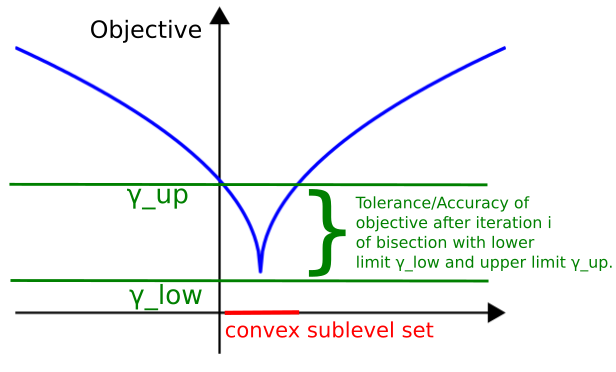

Initial optimization problem: Find a function of the form

$$
f(x) = \frac{a_0 + a_1 t + a_2 t^2}{1 + b_1 t + b_2 t^2}
$$

which best fits the exponential function $y = \mathbf{exp}\left(t\right)$ for t in $[-3, 3]$:

$$
\mathbf{minimize} \; \mathbf{max}_{i=1, \dots, k} \; |f(t_i) - y_i| \\
\mathbf{subject \; to} \; 1 + b_1 t_i + b_2 t_i^2 > 0 \; , \;\;\;\; i=1,\dots,k 
$$

This is a minimax function approximation problem, where we minimize the maximum error.

This cannot be directly solved since the objective is not convex. Therefore rephrase to a convex feasibility problem which can be solved iteratively (see also explanations above):

$$
\begin{align*}
\mathbf{find} & \; a, b\newline
\mathbf{subject \; to} & \; a_0 + a_1 t_i + a_2 t^2_i − y_i (1 + b_1 t_i + b_2 t^2_i) \le \gamma (1 + b_1 t_i + b_2 t^2_i) \; , \;\;\;\; i=1,\dots,k \newline
& \; a_0 + a_1 t_i + a_2 t^2_i − y_i (1 + b_1 t_i + b_2 t^2_i) \ge - \gamma (1 + b_1 t_i + b_2 t^2_i) \; , \;\;\;\; i=1,\dots,k
\end{align*}
$$

or, to accomodate for the cvxpy syntax rephrase to pseudo minimization of a fixed constant parameter:

$$
\begin{align*}
\mathbf{minimize} & \; \textrm{const.} \newline
\mathbf{subject \; to} & \; a_0 + a_1 t_i + a_2 t^2_i − y_i (1 + b_1 t_i + b_2 t^2_i) \le \gamma (1 + b_1 t_i + b_2 t^2_i) \; , \;\;\;\; i=1,\dots,k \newline
& \; a_0 + a_1 t_i + a_2 t^2_i − y_i (1 + b_1 t_i + b_2 t^2_i) \ge - \gamma (1 + b_1 t_i + b_2 t^2_i) \; , \;\;\;\; i=1,\dots,k
\end{align*}
$$

where $a$ and $b$ are vector valued cvx variables that are also found during the optimization.

In [18]:
# Generate samples
k = 201  # number of samples
t = np.array([-3 + 6 * i/(k-1) for i in np.arange(k)])

In [19]:
# Generate powers of t as matrix for batch definitions of constraints below
t_powers = np.array(
    [
        np.repeat(1, k),
        t,
        t*t,
    ]
)

In [20]:
# Generate function values to fit against
y = np.exp(t)

In [21]:
# Create cvx variables to compute
a = cvx.Variable(3)
b = cvx.hstack((1, cvx.Variable(2)))

In [22]:
# construct cvx problem as a function of gamma
def get_problem(gamma: float) -> cvx.Problem:
    objective = cvx.Minimize(0)
    constraints = [
        a @ t_powers - cvx.multiply(y, (b @ t_powers)) <= gamma * (b @ t_powers),
        a @ t_powers - cvx.multiply(y, (b @ t_powers)) >= -gamma * (b @ t_powers),
    ]
    return cvx.Problem(objective, constraints)

In [23]:
# Define function that can update upper and lower bound for the bisection algorithm based
# on the problem status after attempting to solve it
def update_bisection_parameters(
    status: str,
    lower_bound_previous: float,
    upper_bound_previous: float,
    gamma_previous: float
) -> Tuple[float, float, float]:
    
    if status == "optimal":
        # Great, problem is still feasible with the previsous gamma. So let's try to reduce it
        upper_bound_new = gamma_previous
        lower_bound_new = lower_bound_previous
    elif status == "infeasible":
        # Problem is infeasible with the previous. Let's increase it to make the problem feasible again
        upper_bound_new = upper_bound_previous
        lower_bound_new = gamma_previous
    else:
        raise ValueError("Problem status is neither 'optimal' nor 'infeasible'!")
    gamma_new = (upper_bound_new + lower_bound_new) / 2.0
    return lower_bound_new, upper_bound_new, gamma_new

In [24]:
def check_initial_boundaries(
    lower_bound: float,
    upper_bound: float,
) -> None:
    problem = get_problem(upper_bound)
    problem.solve()
    if problem.status != "optimal":
        raise ValueError("Initial upper bound to small. No feasible solution found. Please increase the upper bound.")
    
    problem = get_problem(lower_bound)
    problem.solve()
    if problem.status != "infeasible":
        raise ValueError("Initial lower bound to high. Please decrease the lower bound.")        

In [25]:
initial_lower_bound = 0
initial_upper_bound = np.exp(3.0)
check_initial_boundaries(initial_lower_bound, initial_upper_bound)  # raises if bounds not suitable

In [26]:
desired_accuracy = 0.001

In [34]:
i = 0  # iteration index
lower_bound_i = initial_lower_bound
upper_bound_i = initial_upper_bound
accuracy_i = upper_bound_i - lower_bound_i

while accuracy_i >= desired_accuracy:
    i+=1  # update iteration number
    print(f"Iteration: {i}")
    gamma_i = (upper_bound_i + lower_bound_i)/2.0
    problem = get_problem(gamma_i)
    problem.solve()
    
    lower_bound_i, upper_bound_i, gamma_i = update_bisection_parameters(
        problem.status, lower_bound_i, upper_bound_i, gamma_i
    )

    if problem.status == "optimal":
        a_opt = a.value
        b_opt = b.value
        objective_opt = upper_bound_i
        
    accuracy_i = upper_bound_i - lower_bound_i
    print(f"lower limit: {lower_bound_i}")
    print(f"upper limit: {upper_bound_i}")
    print(f"a: {a_opt}")
    print(f"b: {b_opt}")
    print(f"objective: {objective_opt}")
    print()

Iteration: 1
lower limit: 0
upper limit: 10.042768461593834
a: [-0.23527555  1.26736347  0.64879236]
b: [ 1.         -0.01699556 -0.04748118]
objective: 10.042768461593834

Iteration: 2
lower limit: 0
upper limit: 5.021384230796917
a: [0.46809812 1.50986166 0.55321141]
b: [ 1.         -0.00194264 -0.05488149]
objective: 5.021384230796917

Iteration: 3
lower limit: 0
upper limit: 2.5106921153984585
a: [0.81736899 1.37643447 0.43512193]
b: [ 1.         -0.02720676 -0.0546856 ]
objective: 2.5106921153984585

Iteration: 4
lower limit: 0
upper limit: 1.2553460576992292
a: [0.99212439 1.30765454 0.38142223]
b: [ 1.         -0.05034787 -0.05015538]
objective: 1.2553460576992292

Iteration: 5
lower limit: 0
upper limit: 0.6276730288496146
a: [1.00099854 1.15064357 0.33176083]
b: [ 1.         -0.1314724  -0.02728198]
objective: 0.6276730288496146

Iteration: 6
lower limit: 0
upper limit: 0.3138365144248073
a: [0.95425721 0.8703104  0.23912848]
b: [ 1.         -0.27824017  0.01281353]
objective:

In [35]:
print("Results")
print("-------")
print("a:")
print(f"   {a_opt}")
print("b:")
print(f"   {b_opt}")
print("objective:")
print(f"    {objective_opt}")

Results
-------
a:
   [1.00961902 0.61255482 0.11374098]
b:
   [ 1.         -0.41426767  0.04841357]
objective:
    0.02329255380496617
